In [2]:
import requests

def get_market_data(sui):
    url = f"https://api.coingecko.com/api/v3/coins/sui"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        market_data = {
            "name": data["name"],
            "symbol": data["symbol"],
            "market_cap": data["market_data"]["market_cap"]["usd"],
            "fdv": data["market_data"].get("fully_diluted_valuation", {}).get("usd"),
            "volume_24h": data["market_data"]["total_volume"]["usd"],
            "circulating_supply": data["market_data"]["circulating_supply"],
            "total_supply": data["market_data"]["total_supply"],
            "max_supply": data["market_data"]["max_supply"],
        }
        return market_data
    else:
        raise Exception("Failed to fetch data from CoinGecko")

sui_data = get_market_data("sui")
for key, value in sui_data.items():
    print(f"{key}: {value}")


name: Sui
symbol: sui
market_cap: 10681049129
fdv: 31445638105
volume_24h: 741952323
circulating_supply: 3396671135.364443
total_supply: 10000000000.0
max_supply: 10000000000.0


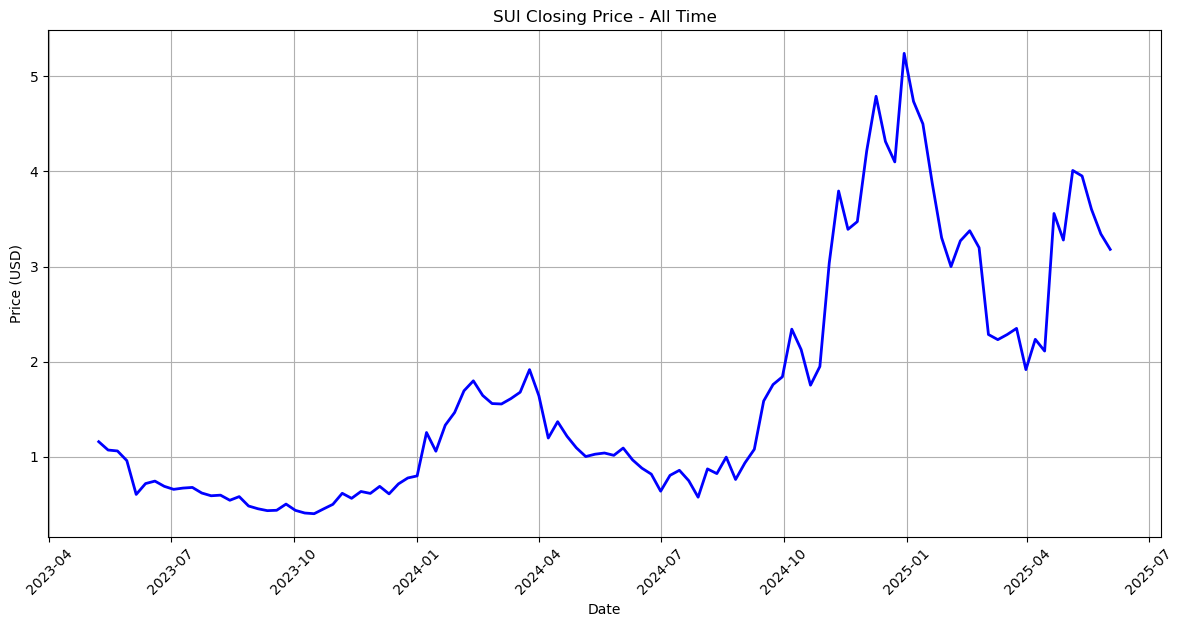

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SUI_All_graph_coinmarketcap.csv', delimiter=';')

df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')

df = df.sort_values('timestamp')

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], color='blue', linewidth=2)
plt.title('SUI Closing Price - All Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


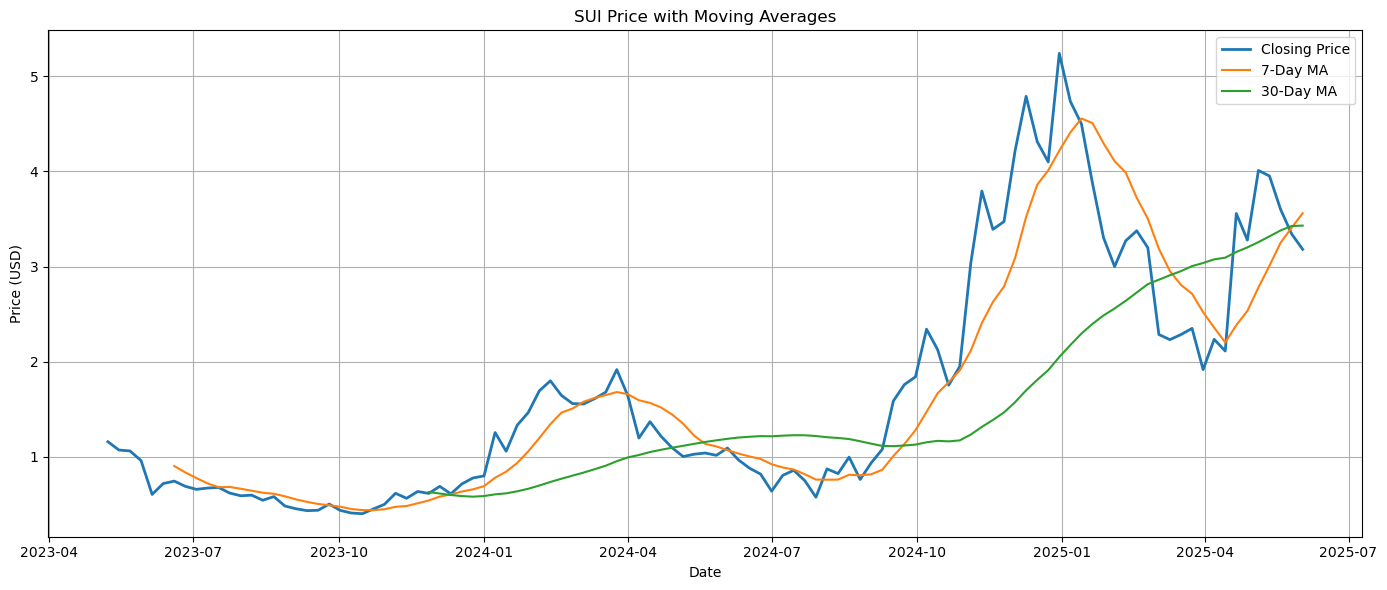

In [15]:
# اضافه کردن میانگین متحرک 7 و 30 روزه
df['MA_7'] = df['close'].rolling(window=7).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()

# رسم نمودار قیمت + میانگین‌ها
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['close'], label='Closing Price', linewidth=2)
plt.plot(df['timestamp'], df['MA_7'], label='7-Day MA')
plt.plot(df['timestamp'], df['MA_30'], label='30-Day MA')
plt.title('SUI Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

df = pd.read_csv('SUI_All_graph_coinmarketcap.csv', delimiter=';')

df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601', errors='coerce')

df = df.dropna(subset=['timestamp'])

df = df.sort_values('timestamp')

current_price = df['close'].iloc[-1]

ath_price = df['close'].max()
atl_price = df['close'].min()

ath_date = df.loc[df['close'].idxmax(), 'timestamp']
atl_date = df.loc[df['close'].idxmin(), 'timestamp']

from_ath = ((current_price - ath_price) / ath_price) * 100
from_atl = ((current_price - atl_price) / atl_price) * 100

print("ATH (All Time High): ${:.2f} on {}".format(ath_price, ath_date.date()))
print("ATL (All Time Low):  ${:.2f} on {}".format(atl_price, atl_date.date()))
print("Distance from ATH: {:.2f}%".format(from_ath))
print("Distance from ATL: {:.2f}%".format(from_atl))
print("Current Price: ${:.2f}".format(current_price))


ATH (All Time High): $5.24 on 2024-12-30
ATL (All Time Low):  $0.40 on 2023-10-16
Distance from ATH: -39.30%
Distance from ATL: 689.13%
Current Price: $3.18


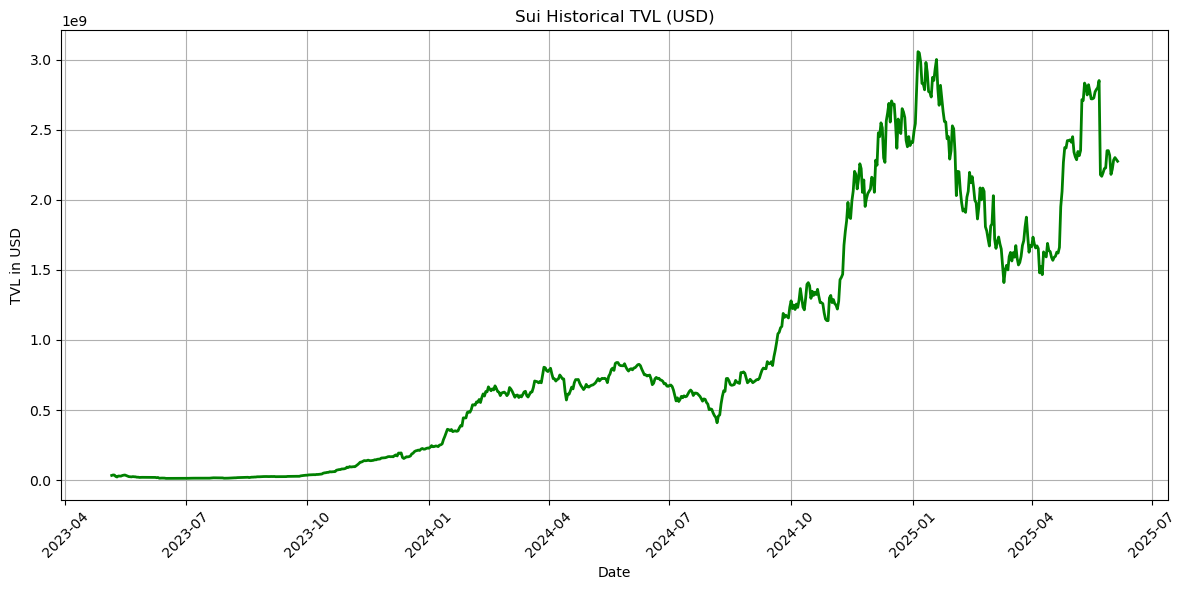

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.llama.fi/charts/Sui"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df['date'] = pd.to_numeric(df['date'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], unit='s')

df = df.sort_values('date')
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['totalLiquidityUSD'], color='green', linewidth=2)
plt.title('Sui Historical TVL (USD)')
plt.xlabel('Date')
plt.ylabel('TVL in USD')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


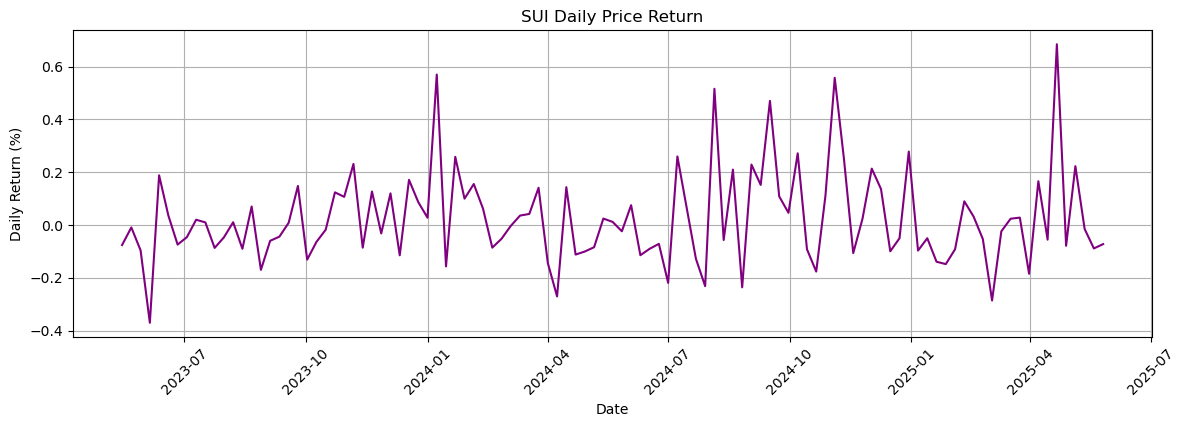

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SUI_All_graph_coinmarketcap.csv', delimiter=';')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df = df.sort_values('timestamp')

df['daily_return'] = df['close'].pct_change()

plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], df['daily_return'], color='purple')
plt.title('SUI Daily Price Return')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [29]:
volatility = df['daily_return'].std()

print("Daily Volatility (std): {:.2%}".format(volatility))


Daily Volatility (std): 17.80%


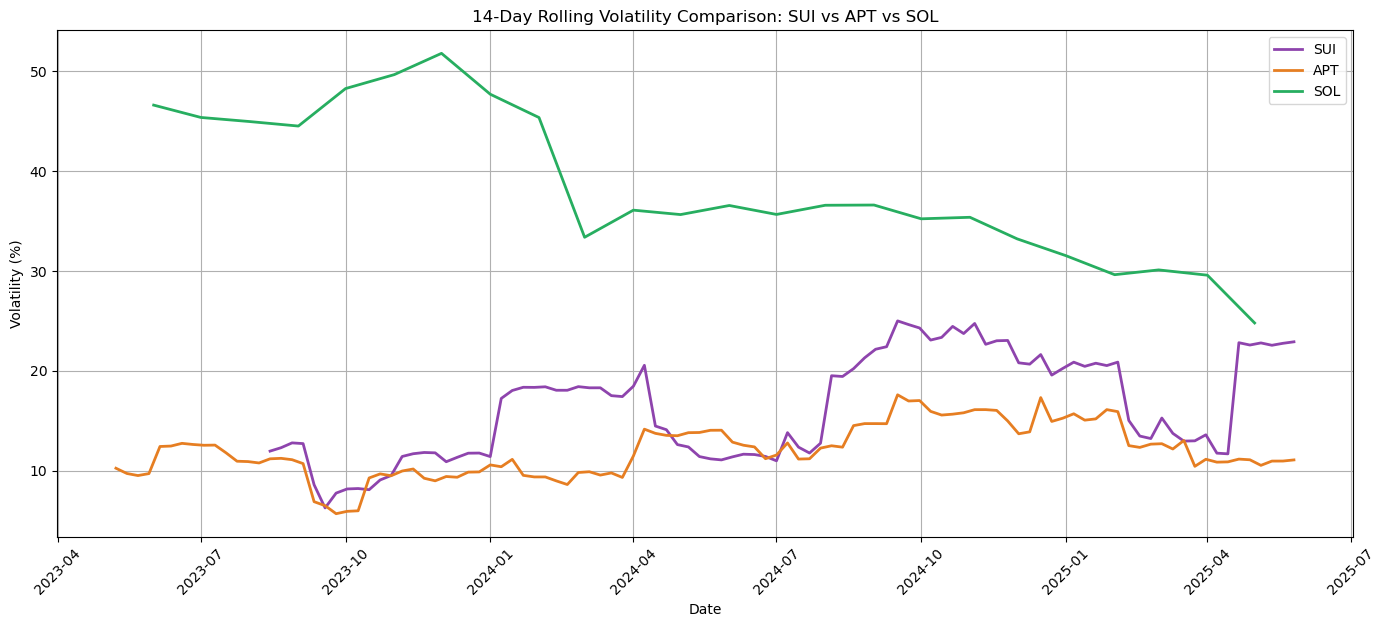

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare(file_path, label):
    df = pd.read_csv(file_path, delimiter=';')
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.dropna(subset=['timestamp'])
    df = df.sort_values('timestamp')

    close_col = [col for col in df.columns if 'close' in col.lower()][0]
    df['daily_return'] = df[close_col].pct_change()
    df['rolling_volatility'] = df['daily_return'].rolling(window=14).std()
    df['asset'] = label
    return df[['timestamp', 'rolling_volatility', 'asset']]

sui = load_and_prepare('SUI_All_graph_coinmarketcap.csv', 'SUI')
apt = load_and_prepare('APT_All_graph_coinmarketcap.csv', 'APT')
sol = load_and_prepare('SOL_All_graph_coinmarketcap.csv', 'SOL')

common_start = max(sui['timestamp'].min(), apt['timestamp'].min(), sol['timestamp'].min())
sui = sui[sui['timestamp'] >= common_start]
apt = apt[apt['timestamp'] >= common_start]
sol = sol[sol['timestamp'] >= common_start]

combined = pd.concat([sui, apt, sol], ignore_index=True)

plt.figure(figsize=(14, 6))

colors = {
    'SUI': '#8e44ad',   
    'APT': '#e67e22',   
    'SOL': '#27ae60'    
}

for asset in combined['asset'].unique():
    data = combined[combined['asset'] == asset]
    plt.plot(data['timestamp'], data['rolling_volatility'] * 100,
             label=asset, color=colors[asset], linewidth=2)

plt.title('14-Day Rolling Volatility Comparison: SUI vs APT vs SOL')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [35]:
import requests

def get_marketcap_fdv(coin_id):
    url = f'https://api.coingecko.com/api/v3/coins/{coin_id}?localization=false&tickers=false&market_data=true'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        market_cap = data['market_data']['market_cap']['usd']
        fdv = data['market_data']['fully_diluted_valuation']['usd']
        name = data['name']
        ratio = market_cap / fdv if fdv else None
        return {
            'name': name,
            'market_cap': market_cap,
            'fdv': fdv,
            'ratio': ratio
        }
    else:
        return {'error': f"Couldn't fetch data: {response.status_code}"}

sui = get_marketcap_fdv("sui")
print(sui)


{'name': 'Sui', 'market_cap': 10892885966, 'fdv': 32069298239, 'ratio': 0.33966711353705215}
